In [1]:
# pandas提供快速，灵活和富有表现力的数据结构，旨在使“关系”或“标记”数据的使用既简单又直观
# 旨在成为在Python中进行实际，真实世界数据分析的基础高级构建块
# pandas非常适合许多不同类型的数据
# （1）具有异构类型列的表格数据，如SQL表或Excel电子表格中
# （2）有序和无序（不一定是固定频率）时间序列数据
# （3）具有行和列标签的任意矩阵数据（均匀类型或异构）
# （4）任何其他形式的观察/统计数据集。实际上不需要将数据标记为放置在pandas数据结构中

In [2]:
# 两个主要数据结构Series（1维）和DataFrame（2维）

In [3]:
# pandas简短介绍

In [132]:
import numpy as np
import pandas as pd
# 对象创建
# 创建一个Series通过传递值的列表（默认的整数索引）
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)
print('-------------------------------------------------------')
# DataFrame通过传递带有日期时间索引和标记列的NumPy数组来创建
dates = pd.date_range('20130101', periods=6)
print(dates)
print('-------------------------------------------------------')
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)
print('-------------------------------------------------------')
# DataFrame通过传递可以转换为类似系列的对象的dict来创建
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
print(df2)
print('-------------------------------------------------------')
print(df2.dtypes) # category 种类

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
-------------------------------------------------------
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
-------------------------------------------------------
                   A         B         C         D
2013-01-01 -1.098394  0.034668 -0.944719 -0.190635
2013-01-02 -1.302479 -0.945226 -0.819277  0.370831
2013-01-03  0.666094  1.048571 -0.757820 -0.174249
2013-01-04  0.183078 -0.048469 -0.804568  1.372302
2013-01-05  1.975575  0.797742  0.210896  0.197676
2013-01-06 -0.126280  0.536951  0.402829 -0.008693
-------------------------------------------------------
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
-----------------------------------------------------

In [134]:
# 查看数据
df.head() # 查看框架的顶行和底行的方法

,A,B,C,D
2013-01-01,-1.098394,0.034668,-0.944719,-0.190635
2013-01-02,-1.302479,-0.945226,-0.819277,0.370831
2013-01-03,0.666094,1.048571,-0.757820,-0.174249
2013-01-04,0.183078,-0.048469,-0.804568,1.372302
2013-01-05,1.975575,0.797742,0.210896,0.197676


In [135]:
df.tail(3)

,A,B,C,D
2013-01-04,0.183078,-0.048469,-0.804568,1.372302
2013-01-05,1.975575,0.797742,0.210896,0.197676
2013-01-06,-0.126280,0.536951,0.402829,-0.008693


In [136]:
df.index # 显示索引，列

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [137]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
# NumPy数组对整个数组有一个dtype，而pandas DataFrames每列有一个dtype

In [138]:
df.describe() # 显示数据的快速统计摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.049599,0.237373,-0.452110,0.261205
std,1.206996,0.718768,0.594249,0.586040
min,-1.302479,-0.945226,-0.944719,-0.190635
25%,-0.855365,-0.027685,-0.815600,-0.132860
50%,0.028399,0.285809,-0.781194,0.094492
75%,0.545340,0.732544,-0.031283,0.327543
max,1.975575,1.048571,0.402829,1.372302


In [139]:
df.T # 转置数据

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.098394,-1.302479,0.666094,0.183078,1.975575,-0.126280
B,0.034668,-0.945226,1.048571,-0.048469,0.797742,0.536951
C,-0.944719,-0.819277,-0.757820,-0.804568,0.210896,0.402829
D,-0.190635,0.370831,-0.174249,1.372302,0.197676,-0.008693


In [145]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.190635,-0.944719,0.034668,-1.098394
2013-01-02,0.370831,-0.819277,-0.945226,-1.302479
2013-01-03,-0.174249,-0.757820,1.048571,0.666094
2013-01-04,1.372302,-0.804568,-0.048469,0.183078
2013-01-05,0.197676,0.210896,0.797742,1.975575
2013-01-06,-0.008693,0.402829,0.536951,-0.126280


In [23]:
df.sort_values(by='B') # 按值排序

,A,B,C,D
2013-01-04,0.533331,-1.723304,-0.926435,-0.451073
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943
2013-01-05,-0.018280,-0.612607,0.555119,1.405104
2013-01-06,2.015361,-0.458078,-2.377058,-0.906461
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505
2013-01-01,0.505369,1.798523,0.655685,-0.598322


In [24]:
# 选择

In [25]:
# 获得（选择一个列，产生一个Series，相当于df.A）
df['A']

2013-01-01    0.505369
2013-01-02    1.479585
2013-01-03   -1.417854
2013-01-04    0.533331
2013-01-05   -0.018280
2013-01-06    2.015361
Freq: D, Name: A, dtype: float64

In [26]:
# 选择via []，对行进行切片
df[0:3]

,A,B,C,D
2013-01-01,0.505369,1.798523,0.655685,-0.598322
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505


In [27]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505
2013-01-04,0.533331,-1.723304,-0.926435,-0.451073


In [28]:
# 按标签选择

In [29]:
# 使用标签获取横截面
df.loc[dates[0]]

A    0.505369
B    1.798523
C    0.655685
D   -0.598322
Name: 2013-01-01 00:00:00, dtype: float64

In [30]:
# 按标签选择多轴
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.505369,1.798523
2013-01-02,1.479585,-1.312917
2013-01-03,-1.417854,0.181191
2013-01-04,0.533331,-1.723304
2013-01-05,-0.018280,-0.612607
2013-01-06,2.015361,-0.458078


In [31]:
# 显示标签切片，两个端点包括
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,1.479585,-1.312917
2013-01-03,-1.417854,0.181191
2013-01-04,0.533331,-1.723304


In [32]:
# 减少返回对象的尺寸
df.loc['20130102', ['A', 'B']]

A    1.479585
B   -1.312917
Name: 2013-01-02 00:00:00, dtype: float64

In [33]:
# 获取标量值
df.loc[dates[0], 'A']

0.5053693762606675

In [34]:
# 为了快速访问标量（相当于以前的方法）
df.at[dates[0], 'A']

0.5053693762606675

In [35]:
# 按位置选择

In [36]:
# 通过传递的整数的位置选择
df.iloc[3]

A    0.533331
B   -1.723304
C   -0.926435
D   -0.451073
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
# 通过整数切片
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.533331,-1.723304
2013-01-05,-0.018280,-0.612607


In [38]:
# 通过整数位置位置列表
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.479585,-0.978775
2013-01-03,-1.417854,-0.709840
2013-01-05,-0.018280,0.555119


In [39]:
# 明确切片行
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505


In [40]:
# 对于明确切片列
df.iloc[:, 1:3]

,B,C
2013-01-01,1.798523,0.655685
2013-01-02,-1.312917,-0.978775
2013-01-03,0.181191,-0.709840
2013-01-04,-1.723304,-0.926435
2013-01-05,-0.612607,0.555119
2013-01-06,-0.458078,-2.377058


In [41]:
# 为了明确获取值
df.iloc[1, 1]

-1.312917416618431

In [42]:
# 为了快速访问标量
df.iat[1, 1]

-1.312917416618431

In [43]:
# 布尔索引

In [44]:
# 使用单个列的值来选择数据
df[df.A > 0]

,A,B,C,D
2013-01-01,0.505369,1.798523,0.655685,-0.598322
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943
2013-01-04,0.533331,-1.723304,-0.926435,-0.451073
2013-01-06,2.015361,-0.458078,-2.377058,-0.906461


In [45]:
# 从满足布尔条件的DataFrame中选择值
df[df > 0]

,A,B,C,D
2013-01-01,0.505369,1.798523,0.655685,NaN
2013-01-02,1.479585,NaN,NaN,NaN
2013-01-03,NaN,0.181191,NaN,NaN
2013-01-04,0.533331,NaN,NaN,NaN
2013-01-05,NaN,NaN,0.555119,1.405104
2013-01-06,2.015361,NaN,NaN,NaN


In [46]:
# 使用isin()过滤方法
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.505369,1.798523,0.655685,-0.598322,one
2013-01-02,1.479585,-1.312917,-0.978775,-1.489943,one
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505,two
2013-01-04,0.533331,-1.723304,-0.926435,-0.451073,three
2013-01-05,-0.018280,-0.612607,0.555119,1.405104,four
2013-01-06,2.015361,-0.458078,-2.377058,-0.906461,three


In [47]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.417854,0.181191,-0.709840,-2.617505,two
2013-01-05,-0.018280,-0.612607,0.555119,1.405104,four


In [48]:
# 设定
# 设置新列会自动根据索引对齐数据
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
# 按标签设置值
df.at[dates[0], 'A'] = 0
# 按位置设置值
df.iat[0, 1] = 0
# 通过使用NumPy数组进行设置
df.loc[:, 'D'] = np.array([5] * len(df))
# 先前设置操作的结果
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.655685,5
2013-01-02,1.479585,-1.312917,-0.978775,5
2013-01-03,-1.417854,0.181191,-0.709840,5
2013-01-04,0.533331,-1.723304,-0.926435,5
2013-01-05,-0.018280,-0.612607,0.555119,5
2013-01-06,2.015361,-0.458078,-2.377058,5


In [51]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.655685,-5
2013-01-02,-1.479585,-1.312917,-0.978775,-5
2013-01-03,-1.417854,-0.181191,-0.709840,-5
2013-01-04,-0.533331,-1.723304,-0.926435,-5
2013-01-05,-0.018280,-0.612607,-0.555119,-5
2013-01-06,-2.015361,-0.458078,-2.377058,-5


In [52]:
# 缺少数据
# pandas主要使用该值np.nan来表示缺失的数据。默认情况下，它不包含在计算中

In [53]:
# 重建索引允许您更改/添加/删除指定轴上的索引
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.655685,5,1.0
2013-01-02,1.479585,-1.312917,-0.978775,5,1.0
2013-01-03,-1.417854,0.181191,-0.709840,5,NaN
2013-01-04,0.533331,-1.723304,-0.926435,5,NaN


In [54]:
# 删除任何缺少数据的行
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.655685,5,1.0
2013-01-02,1.479585,-1.312917,-0.978775,5,1.0


In [55]:
# 填写缺失的数据
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.655685,5,1.0
2013-01-02,1.479585,-1.312917,-0.978775,5,1.0
2013-01-03,-1.417854,0.181191,-0.709840,5,5.0
2013-01-04,0.533331,-1.723304,-0.926435,5,5.0


In [56]:
# 获取值所在的布尔掩码nan
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [57]:
# 操作

In [58]:
# 统计（操作通常排除丢失的数据）

In [59]:
# 执行描述性统计
df.mean()

A    0.432024
B   -0.654286
C   -0.630217
D    5.000000
dtype: float64

In [60]:
 df.mean(1)

2013-01-01    1.413921
2013-01-02    1.046973
2013-01-03    0.763374
2013-01-04    0.720898
2013-01-05    1.231058
2013-01-06    1.045056
Freq: D, dtype: float64

In [63]:
# 使用具有不同维度且需要对齐的对象进行操作。此外，pandas会自动沿指定维度进行广播
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
print(s)
print(df.sub(s, axis='index'))

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64
                   A         B         C    D
2013-01-01       NaN       NaN       NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN
2013-01-03 -2.417854 -0.818809 -1.709840  4.0
2013-01-04 -2.466669 -4.723304 -3.926435  2.0
2013-01-05 -5.018280 -5.612607 -4.444881  0.0
2013-01-06       NaN       NaN       NaN  NaN


In [64]:
# 申请

In [65]:
# 将函数应用于数据
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.655685,5
2013-01-02,1.479585,-1.312917,-0.323090,10
2013-01-03,0.061731,-1.131726,-1.032930,15
2013-01-04,0.595062,-2.855031,-1.959365,20
2013-01-05,0.576781,-3.467638,-1.404247,25
2013-01-06,2.592142,-3.925716,-3.781305,30


In [66]:
df.apply(lambda x: x.max() - x.min())

A    3.433214
B    1.904496
C    3.032743
D    0.000000
dtype: float64

In [67]:
# 直方图

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    6
2    5
3    1
4    5
5    4
6    0
7    0
8    4
9    6
dtype: int32

In [69]:
s.value_counts()

5    3
6    2
4    2
0    2
1    1
dtype: int64

In [70]:
# 字符串方法
# str中的模式匹配通常默认使用正则表达式（在某些情况下总是使用它们）
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [71]:
# 合并

In [72]:
# CONCAT 可以轻松地将Series，DataFrame和Panel对象与各种设置逻辑组合在一起，用于索引和关联代数功能（在连接/合并类型操作的情况下）
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.666064,0.152354,1.089993,0.747680
1,1.354756,-0.054511,0.338169,-2.656097
2,-0.439073,-0.246232,1.220440,-1.159213
3,-0.397602,-1.979174,1.345811,-1.115006
4,-0.184964,1.201339,-0.764983,0.323799
5,-0.652865,1.931764,1.520925,1.089385
6,-1.217615,1.829312,0.597112,0.125613
7,-0.210938,-0.757143,-1.974281,-0.593483
8,0.349656,0.345749,-1.428884,0.885574
9,0.498388,-0.314626,-0.116825,0.770082


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,-0.666064,0.152354,1.089993,0.747680
1,1.354756,-0.054511,0.338169,-2.656097
2,-0.439073,-0.246232,1.220440,-1.159213
3,-0.397602,-1.979174,1.345811,-1.115006
4,-0.184964,1.201339,-0.764983,0.323799
5,-0.652865,1.931764,1.520925,1.089385
6,-1.217615,1.829312,0.597112,0.125613
7,-0.210938,-0.757143,-1.974281,-0.593483
8,0.349656,0.345749,-1.428884,0.885574
9,0.498388,-0.314626,-0.116825,0.770082


In [76]:
# 加入
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [77]:
right

,key,rval
0,foo,4
1,foo,5


In [78]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [79]:
# 另一个例子是
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [82]:
# 追加(将行附加到数据框)
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.402661,-0.510316,-0.007034,-0.431802
1,0.651432,1.951743,-0.175218,-0.157499
2,0.633128,-1.808706,-1.908944,-0.968313
3,1.198436,0.267819,-1.489654,-0.237495
4,1.222260,1.279037,0.278761,-0.319734
5,-1.347605,0.045874,1.446190,0.515467
6,-0.661830,0.092907,1.565314,-1.140364
7,-0.011253,0.633183,1.203746,-1.319512


In [83]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.402661,-0.510316,-0.007034,-0.431802
1,0.651432,1.951743,-0.175218,-0.157499
2,0.633128,-1.808706,-1.908944,-0.968313
3,1.198436,0.267819,-1.489654,-0.237495
4,1.222260,1.279037,0.278761,-0.319734
5,-1.347605,0.045874,1.446190,0.515467
6,-0.661830,0.092907,1.565314,-1.140364
7,-0.011253,0.633183,1.203746,-1.319512
8,1.198436,0.267819,-1.489654,-0.237495


In [84]:
# 分组
# 通过“分组依据”，我们指的是涉及以下一个或多个步骤的过程：

    # (1)根据某些标准将数据拆分为组
    # (2)将功能独立应用于每个组
    # (3)将结果组合成数据结构

In [85]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.248016,0.715301
1,bar,one,-0.816776,-0.214058
2,foo,two,-0.050260,0.461118
3,bar,three,-0.704317,-2.128362
4,foo,two,-0.145816,0.127556
5,bar,two,0.200427,0.820828
6,foo,one,1.633266,0.754474
7,foo,three,0.858534,2.054520


In [86]:
# 分组然后将sum()函数应用于结果组
df.groupby('A').sum()

,C,D
A,,
bar,-1.320667,-1.521592
foo,2.543740,4.112969


In [87]:
# 按多列分组形成分层索引，我们再次可以应用该sum功能
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.816776 -0.214058
    three -0.704317 -2.128362
    two    0.200427  0.820828
foo one    1.881282  1.469775
    three  0.858534  2.054520
    two   -0.196076  0.588673

In [88]:
# 重塑

In [89]:
# (1) 堆栈

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.276964  1.459891
      two    -1.177225  0.472353
baz   one    -0.828861  0.949592
      two    -2.214344  2.520526

In [91]:
# 该stack()方法“压缩”DataFrame列中的级别
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.276964
               B    1.459891
       two     A   -1.177225
               B    0.472353
baz    one     A   -0.828861
               B    0.949592
       two     A   -2.214344
               B    2.520526
dtype: float64

In [92]:
# 使用“堆叠”DataFrame或Series（具有MultiIndexas index），stack()is 的逆操作，unstack()默认情况下取消堆叠最后一级
stacked.unstack()

A         B
first second                    
bar   one    -0.276964  1.459891
      two    -1.177225  0.472353
baz   one    -0.828861  0.949592
      two    -2.214344  2.520526

In [93]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.276964 -1.177225
      B  1.459891  0.472353
baz   A -0.828861 -2.214344
      B  0.949592  2.520526

In [94]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.276964 -0.828861
       B  1.459891  0.949592
two    A -1.177225 -2.214344
       B  0.472353  2.520526

In [95]:
# 数据透视表

In [96]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.081136,-1.207498
1,one,B,foo,-2.649618,-1.312482
2,two,C,foo,-0.158599,-0.758510
3,three,A,bar,0.337450,-0.437289
4,one,B,bar,0.444146,0.991920
5,one,C,bar,-0.742042,1.222964
6,two,A,foo,-0.179378,0.752539
7,three,B,foo,0.671035,0.566976
8,one,C,foo,1.252002,-1.769094
9,one,A,bar,0.754388,0.660120


In [97]:
# 可以非常轻松地从这些数据生成数据透视表
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.754388 -0.081136
      B  0.444146 -2.649618
      C -0.742042  1.252002
three A  0.337450       NaN
      B       NaN  0.671035
      C -1.164992       NaN
two   A       NaN -0.179378
      B  0.801575       NaN
      C       NaN -0.158599

In [98]:
# 时间序列
# pandas具有简单，强大且高效的功能，用于在频率转换期间执行重采样操作

In [99]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25983
Freq: 5T, dtype: int32

In [100]:
# 时区代表
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.567421
2012-03-07    0.315875
2012-03-08   -2.166817
2012-03-09    0.044359
2012-03-10   -0.719081
Freq: D, dtype: float64

In [101]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.567421
2012-03-07 00:00:00+00:00    0.315875
2012-03-08 00:00:00+00:00   -2.166817
2012-03-09 00:00:00+00:00    0.044359
2012-03-10 00:00:00+00:00   -0.719081
Freq: D, dtype: float64

In [102]:
# 转换为另一个时区
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.567421
2012-03-06 19:00:00-05:00    0.315875
2012-03-07 19:00:00-05:00   -2.166817
2012-03-08 19:00:00-05:00    0.044359
2012-03-09 19:00:00-05:00   -0.719081
Freq: D, dtype: float64

In [103]:
# 在时间跨度表示之间转换
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.183339
2012-02-29   -1.947391
2012-03-31   -0.748132
2012-04-30   -0.101960
2012-05-31   -1.122710
Freq: M, dtype: float64

In [104]:
ps = ts.to_period()
ps

2012-01    0.183339
2012-02   -1.947391
2012-03   -0.748132
2012-04   -0.101960
2012-05   -1.122710
Freq: M, dtype: float64

In [105]:
ps.to_timestamp()

2012-01-01    0.183339
2012-02-01   -1.947391
2012-03-01   -0.748132
2012-04-01   -0.101960
2012-05-01   -1.122710
Freq: MS, dtype: float64

In [106]:
# 我们将季度频率与11月结束的年度转换为季度结束后的月末的上午9点
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.250295
1990-06-01 09:00    1.066822
1990-09-01 09:00   -1.066353
1990-12-01 09:00   -0.190760
1991-03-01 09:00    0.225237
Freq: H, dtype: float64

In [107]:
# 分类

In [108]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
# 将原始成绩转换为分类数据类型
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [109]:
# 将类别重命名为更有意义的名称
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [110]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [111]:
# 排序是按类别中的每个顺序排序，而不是词汇顺序
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [112]:
# 按分类列分组还显示空类别
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [113]:
# 绘图

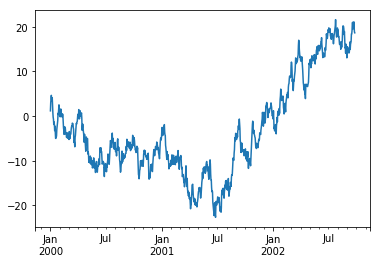

In [115]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

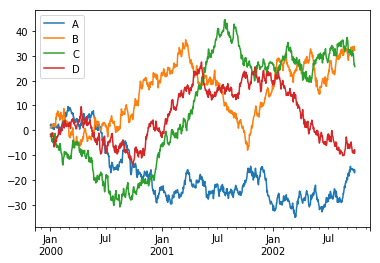

In [120]:
# 在DataFrame上，该plot()方法可以方便地使用标签绘制所有列
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [121]:
# 获取数据进/出

In [122]:
df.to_csv('foo.csv') # 写入csv文件

In [123]:
pd.read_csv('foo.csv') # 从csv文件中读取

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.969046,0.939821,-2.372549,-1.560428
1,2000-01-02,1.987617,0.908619,-1.867301,-1.486997
2,2000-01-03,2.480399,0.952222,-2.606129,-1.387070
3,2000-01-04,1.559962,1.190758,-2.241467,-1.764037
4,2000-01-05,0.991861,1.620625,-3.892225,-2.615437
5,2000-01-06,1.394751,1.521927,-4.494549,-1.090279
6,2000-01-07,1.033782,1.838641,-3.816792,-1.534740
7,2000-01-08,0.687388,2.299756,-3.454861,-1.171371
8,2000-01-09,0.710728,1.810940,-4.945995,-1.139978
9,2000-01-10,2.261764,1.680611,-5.036189,-2.369313


In [124]:
# 写入HDF5
df.to_hdf('foo.h5', 'df')

In [125]:
# 从HDF5阅读
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,1.969046,0.939821,-2.372549,-1.560428
2000-01-02,1.987617,0.908619,-1.867301,-1.486997
2000-01-03,2.480399,0.952222,-2.606129,-1.387070
2000-01-04,1.559962,1.190758,-2.241467,-1.764037
2000-01-05,0.991861,1.620625,-3.892225,-2.615437
2000-01-06,1.394751,1.521927,-4.494549,-1.090279
2000-01-07,1.033782,1.838641,-3.816792,-1.534740
2000-01-08,0.687388,2.299756,-3.454861,-1.171371
2000-01-09,0.710728,1.810940,-4.945995,-1.139978
2000-01-10,2.261764,1.680611,-5.036189,-2.369313


In [126]:
# 写入excel文件
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [127]:
# 从excel文件中读取
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.969046,0.939821,-2.372549,-1.560428
2000-01-02,1.987617,0.908619,-1.867301,-1.486997
2000-01-03,2.480399,0.952222,-2.606129,-1.387070
2000-01-04,1.559962,1.190758,-2.241467,-1.764037
2000-01-05,0.991861,1.620625,-3.892225,-2.615437
2000-01-06,1.394751,1.521927,-4.494549,-1.090279
2000-01-07,1.033782,1.838641,-3.816792,-1.534740
2000-01-08,0.687388,2.299756,-3.454861,-1.171371
2000-01-09,0.710728,1.810940,-4.945995,-1.139978
2000-01-10,2.261764,1.680611,-5.036189,-2.369313


In [129]:
# 陷阱
# if pd.Series([False, True, False]):
#     print("I was true")
# The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()